In [21]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import skimage.filters as filters
import skimage.feature as feature
import skimage.transform as transform

def show_gray(*args, **kwargs):
    show(*args, cmap="gray", **kwargs)

def show(*args, **kwargs):
    import matplotlib.pyplot as plt
    if (len(args) == 1):
        plt.imshow(args[0], **kwargs)
    else:
        f, axis = plt.subplots(1,len(args))
        f.set_figheight(25)
        f.set_figwidth(25)
        for (image,i) in zip(args,range(len(args))):
            axis[i].imshow(image, **kwargs)
    plt.show()

def to_gray(img):
    return np.mean(img, axis=2)

In [29]:
def hough(img, edge, num_peaks):
    h, theta, d = transform.hough_line(edge)
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(edge, cmap=matplotlib.cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(np.log(1 + h),
                extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
                cmap=matplotlib.cm.gray, aspect=1/1.5)
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    ax[2].imshow(img, cmap=matplotlib.cm.gray)
    origin = np.array((0, img.shape[1]))
    counter = 0
    for _, angle, dist in zip(*transform.hough_line_peaks(h, theta, d)):
        y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
        ax[2].plot(origin, (y0, y1), '-r')
        counter += 1
        if counter >= num_peaks:
            break
    ax[2].set_xlim(origin)
    ax[2].set_ylim((img.shape[0], 0))
    ax[2].set_axis_off()
    ax[2].set_title('Detected lines')

    plt.tight_layout()
    plt.show()

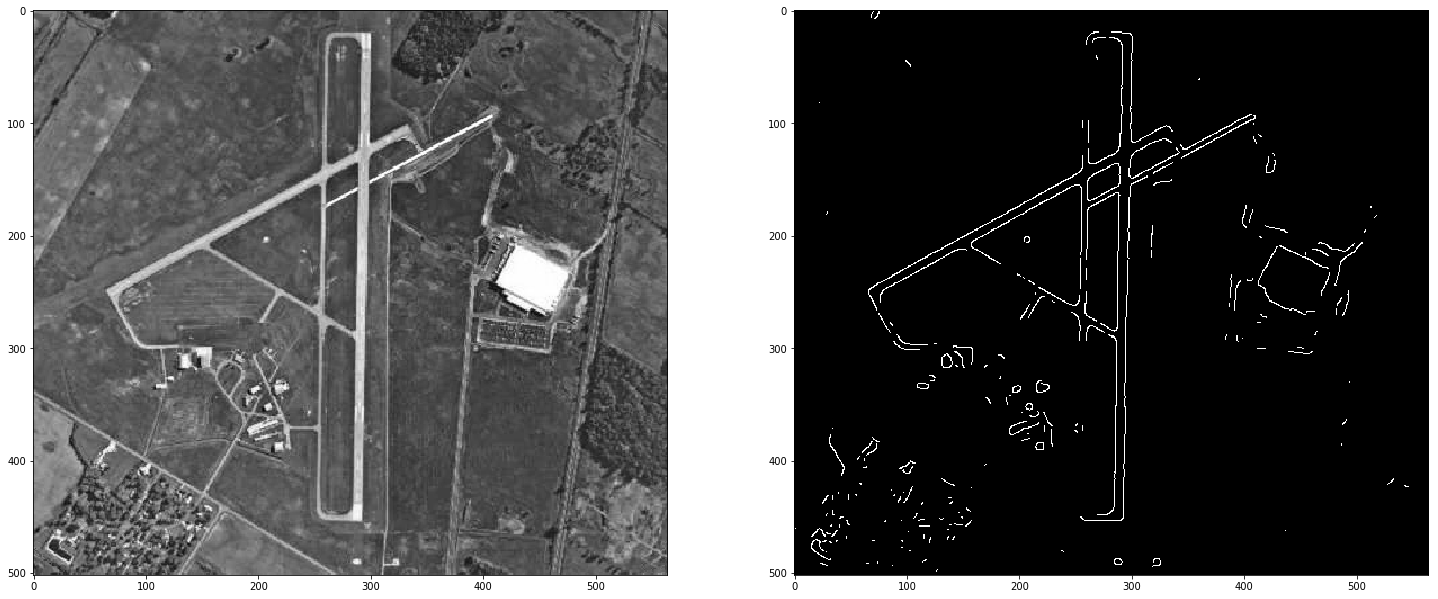

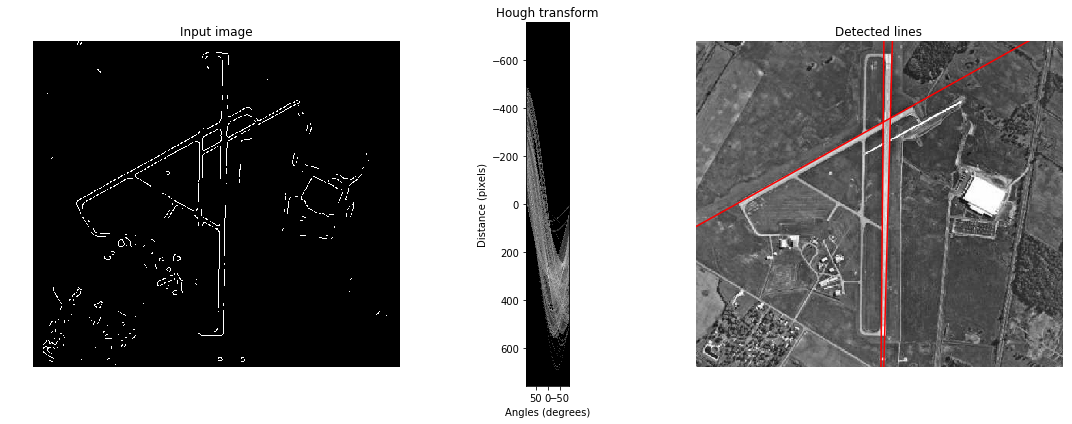

In [30]:
airport = imageio.imread("airport.tif")
airport_edge = feature.canny(airport, sigma=2.0, low_threshold=100)

show_gray(airport, airport_edge)
hough(airport, airport_edge, 3)


In [ ]:
airport_gauss = imageio.imread("airport.tif")
airport_edge = feature.canny(airport, sigma=2.0, low_threshold=100)

show_gray(airport, airport_edge)
hough(airport, airport_edge, 3)